Question 1: What is Boosting in Machine Learning? Explain how it improves weak
learners.

In [ ]:
'''
Boosting is an ensemble learning technique that combines multiple weak learners (usually simple models like small decision trees)
to create a strong and accurate model.
The idea is instead of training all models independently, boosting trains them sequentially,
where each new model focuses on the mistakes made by the previous ones. In every round, it gives more weight to the misclassified data points,
so the next learner pays extra attention to them.
Over time, these weak learners “boost” each other’s performance, leading to a final model that performs far better than any individual learner.
'''

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

In [ ]:
'''
Both AdaBoost and Gradient Boosting are boosting techniques, but they improve models in slightly different ways.
In AdaBoost (Adaptive Boosting), each new model focuses more on the data points that were misclassified by the previous models.
It adjusts the weights of the samples — giving more importance to hard-to-predict cases so the next model can correct them.
In Gradient Boosting, instead of adjusting weights, each new model tries to minimize the errors (residuals) made by the previous model using gradient descent.
It fits the next model to the remaining errors step by step, gradually improving the overall prediction.
A simple way to understand it:
AdaBoost corrects mistakes by reweighting the data points.
Gradient Boosting corrects mistakes by learning from the residual errors using gradients.
Both aim for the same goal — to turn weak learners into a strong one — but they take different routes to get there.
'''

Question 3: How does regularization help in XGBoost?

In [ ]:
'''
In XGBoost, regularization helps the model stay balanced and generalizable — it prevents it from becoming too complex
or fitting the training data too perfectly (which can lead to overfitting).
Regularization works by adding a penalty to the model for using too many features or creating overly complicated decision trees.
This encourages the algorithm to focus only on the patterns that truly matter, instead of memorizing noise from the data.
In short, regularization in XGBoost keeps the model simple, avoids overfitting, and improves real-world performance.
'''

Question 4: Why is CatBoost considered efficient for handling categorical data?

In [ ]:
'''
CatBoost is designed to handle categorical data smartly and efficiently — that’s actually where its name comes from (“Category” + “Boosting”).
Unlike other algorithms that need you to manually convert categories into numbers using methods like one-hot encoding,
CatBoost does this automatically. It uses a clever technique called “target encoding with permutations,” which transforms
categories into numbers based on how they relate to the target variable — without leaking information from the training set.
This makes CatBoost not only faster and easier to use, but also more accurate when dealing with real-world datasets that have
lots of categorical features like “city,” “product type,” or “education level.”
'''

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?


In [ ]:
'''
Boosting techniques are often preferred in situations where we need high accuracy and the data has complex patterns that simple models can’t capture easily.
For example:
1.Finance: Boosting is used for credit scoring and fraud detection, where even small improvements in accuracy can save a lot of money.
2.Marketing: Companies use boosting for customer churn prediction or personalized recommendations, as it can detect hidden relationships in customer behavior.
'''

Datasets:
● Use sklearn.datasets.load_breast_cancer() for classification tasks.
● Use sklearn.datasets.fetch_california_housing() for regression
tasks.

Question 6: Write a Python program to:
● Train an AdaBoost Classifier on the Breast Cancer dataset
● Print the model accuracy

In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [6]:
data=load_breast_cancer()

In [7]:
X,y=data.data,data.target

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
adaboost=AdaBoostClassifier(n_estimators=100, random_state=42)

In [14]:
adaboost.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [15]:
y_pred=adaboost.predict(X_test)

In [18]:
accuracy=accuracy_score(y_test,y_pred)
print(f'The accuracy for this model is:{accuracy:.2f}')

The accuracy for this model is:0.97


Question 7: Write a Python program to:
● Train a Gradient Boosting Regressor on the California Housing dataset
● Evaluate performance using R-squared score


In [19]:
data=fetch_california_housing()

In [20]:
X,y=data.data,data.target

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [24]:
gbreg=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,random_state=42)

In [25]:
gbreg.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [26]:
y_pred=gbreg.predict(X_test)

In [27]:
from sklearn.metrics import r2_score

In [28]:
score=r2_score(y_test,y_pred)

In [30]:
print(f'The R squared score for this Gradient Boosting regressor model is:{score:.2f}')

The R squared score for this Gradient Boosting regressor model is:0.78


Question 8: Write a Python program to:
● Train an XGBoost Classifier on the Breast Cancer dataset
● Tune the learning rate using GridSearchCV
● Print the best parameters and accuracy

In [69]:
data=load_breast_cancer()

In [70]:
X,y=data.data,data.target

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [72]:
from xgboost import XGBClassifier

In [73]:
xgbc=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

In [74]:
import warnings
warnings.filterwarnings('ignore')

In [75]:
xgbc.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [76]:
y_pred = xgbc.predict(X_test)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy without tuningis: {accuracy:.2f}")

Accuracy without tuningis: 0.96


In [78]:
param={'learning_rate':[0.01,0.1,0.2,0.3,0.4,0.5]}

In [79]:
from sklearn.model_selection import GridSearchCV

In [80]:
model=GridSearchCV(xgbc,param,cv=5,verbose=2)

In [81]:
model.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.3s
[CV] END .................................learning_rate=0.01; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.1; total time=   0.2s
[CV] END ..................................learning_rate=0.1; total time=   0.1s
[CV] END ..................................learning_rate=0.2; total time=   0.1s
[CV] END ..................................learni

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]},
             verbose=2)

In [82]:
y_pred=model.predict(X_test)

In [83]:
accuracy=accuracy_score(y_test,y_pred)
print(f'The accuracy after tuning is:{accuracy:.2f}')

The accuracy after tuning is:0.96


In [84]:
best_model = model.best_estimator_

In [85]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [86]:
print(f"Best Parameters: {model.best_params_}")

Best Parameters: {'learning_rate': 0.2}


Question 9: Write a Python program to:
● Train a CatBoost Classifier
● Plot the confusion matrix using seaborn

In [53]:
data = load_breast_cancer()
X = data.data
y = data.target

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [57]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.5 MB/s eta 0:00:00


In [58]:
from catboost import CatBoostClassifier

In [59]:
model = CatBoostClassifier(verbose=0, random_state=42)
model.fit(X_train, y_train)


In [62]:
from sklearn.metrics import confusion_matrix

In [60]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


In [63]:
cm = confusion_matrix(y_test, y_pred)


In [64]:
cm

array([[40,  3],
       [ 2, 69]])

In [66]:
import matplotlib.pyplot as plt

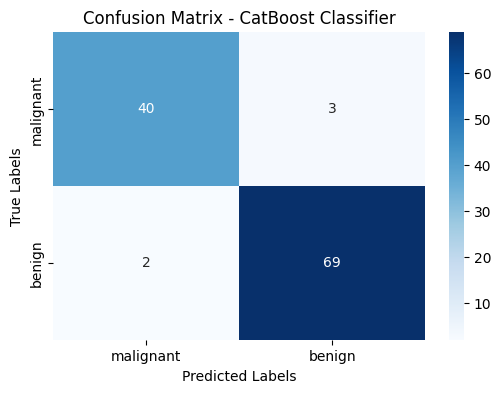

In [67]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - CatBoost Classifier')
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.
The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.
Describe your step-by-step data science pipeline using boosting techniques:
● Data preprocessing & handling missing/categorical values
● Choice between AdaBoost, XGBoost, or CatBoost
● Hyperparameter tuning strategy
● Evaluation metrics you'd choose and why
● How the business would benefit from your model


In [ ]:
'''
Working for a FinTech company and tryoing to predict the loan default customers using their dempgraiocs and transactional behaviour my steps to solve the following
problem are given as:
1. Data Preprocessing:
  Fill missing values (median for numeric, mode or “Unknown” for categorical).
  Use CatBoost to handle categorical features directly; no heavy encoding needed.
  Check for outliers; scaling is optional for tree-based models.
2. Choosing the Boosting Model:
  CatBoost is ideal for mixed data and missing values.
  XGBoost is powerful if categories are preprocessed.
  AdaBoost works for simpler datasets.
3. Hyperparameter Tuning:
  Tune learning_rate, n_estimators, max_depth, and subsample.
  Use GridSearchCV or RandomizedSearchCV; apply early stopping to prevent overfitting.
4. Evaluation Metrics:
  Dataset is imbalanced → focus on ROC-AUC, F1-score, and Precision-Recall rather than plain accuracy.
5. Business Benefit:
  Detect high-risk borrowers early.
  Reduce defaults and financial loss.
  Enable data-driven decisions and targeted customer strategies.
'''